In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import sklearn

In [2]:
test_df = pd.read_csv("./Resources/test.csv", sep = ';')
train_df = pd.read_csv("./Resources/train.csv", sep = ';')
ireland_df = pd.read_csv("./Resources/empress_of_ireland_passenger_list.csv", sep = ';')
estonia_df = pd.read_csv("./Resources/estonia-passenger-list-cleaned.csv")
gender_df = pd.read_csv("./Resources/gender_submission.csv")

In [3]:
#Reading in the datasets
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#Gender contains the survival data
test_merge = test_df.merge(gender_df)
test_merge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#Combining the training and testing datasets since they will be split later
titanic_df = pd.concat([train_df, test_merge], join="inner").reset_index(drop=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
#Setting the year that the disasters occurred
titanic_df['Year'] = 1912
estonia_df['Year'] = 1994
ireland_df['Year'] = 1914

In [8]:
estonia_df.dtypes

Survived     int64
Pclass       int64
Name        object
Sex         object
Age          int64
Year         int64
dtype: object

In [9]:
#Estonia did not have passenger classes so just setting them to 2nd class which is the middle
estonia_df['Pclass'] = estonia_df['Pclass'].replace(to_replace=1, value=2)
estonia_df

,Survived,Pclass,Name,Sex,Age,Year
0,0,2,"Aadli, Arvid Kalle",male,62,1994
1,0,0,"Aaliste, Lea",female,22,1994
2,0,0,"Aavaste, Airi",female,21,1994
3,0,0,"Aavik, Juri",male,53,1994
4,0,2,"Ahlstrom, Britta Elisabet",female,55,1994
...,...,...,...,...,...,...
984,0,2,"Ostrom, Anna Ingrid Birgitta",female,60,1994
985,1,2,"Oun, Elmar Mikael",male,34,1994
986,0,2,"Qunapuu, Enn",male,77,1994
987,0,2,"Gunapuu, Ly",female,87,1994


In [10]:
#Combining them all together
concat_df = pd.concat([titanic_df, estonia_df], join='inner')
combined_df = pd.concat([concat_df, ireland_df], join='inner')
combined_df.dropna(inplace=True)
combined_df = combined_df.reset_index(drop=True)
combined_df

,Survived,Pclass,Name,Sex,Age,Year
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1912
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1912
2,1,3,"Heikkinen, Miss. Laina",female,26.0,1912
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1912
4,0,3,"Allen, Mr. William Henry",male,35.0,1912
...,...,...,...,...,...,...
2838,1,3,"Zuk, Mr. Georgi",male,32.0,1914
2839,0,3,"Zuk, Mrs. Georgi (Maria)",female,32.0,1914
2840,0,3,"Zuk, Master Wladislaw",male,6.0,1914
2841,0,3,"Zuk, Miss Josefa",female,5.0,1914


In [11]:
#Changing it into a categorical variable
combined_df['Pclass'] = combined_df['Pclass'].replace(to_replace=0, value='Crew')
combined_df['Pclass'] = combined_df['Pclass'].replace(to_replace=1, value='3rd Class')
combined_df['Pclass'] = combined_df['Pclass'].replace(to_replace=2, value='2nd Class')
combined_df['Pclass'] = combined_df['Pclass'].replace(to_replace=3, value='1st Class')
combined_df

,Survived,Pclass,Name,Sex,Age,Year
0,0,1st Class,"Braund, Mr. Owen Harris",male,22.0,1912
1,1,3rd Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1912
2,1,1st Class,"Heikkinen, Miss. Laina",female,26.0,1912
3,1,3rd Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1912
4,0,1st Class,"Allen, Mr. William Henry",male,35.0,1912
...,...,...,...,...,...,...
2838,1,1st Class,"Zuk, Mr. Georgi",male,32.0,1914
2839,0,1st Class,"Zuk, Mrs. Georgi (Maria)",female,32.0,1914
2840,0,1st Class,"Zuk, Master Wladislaw",male,6.0,1914
2841,0,1st Class,"Zuk, Miss Josefa",female,5.0,1914


In [12]:
combined_df['Age'].value_counts()

24.00    88
30.00    85
21.00    84
22.00    79
29.00    79
         ..
38.50     1
0.17      1
11.50     1
60.50     1
0.67      1
Name: Age, Length: 117, dtype: int64

In [13]:
#Rounding down all ages since the data we're comparing them only contains distinct ages, not continuous
combined_df['Age'] = np.floor(combined_df['Age'])
combined_df

,Survived,Pclass,Name,Sex,Age,Year
0,0,1st Class,"Braund, Mr. Owen Harris",male,22.0,1912
1,1,3rd Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1912
2,1,1st Class,"Heikkinen, Miss. Laina",female,26.0,1912
3,1,3rd Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1912
4,0,1st Class,"Allen, Mr. William Henry",male,35.0,1912
...,...,...,...,...,...,...
2838,1,1st Class,"Zuk, Mr. Georgi",male,32.0,1914
2839,0,1st Class,"Zuk, Mrs. Georgi (Maria)",female,32.0,1914
2840,0,1st Class,"Zuk, Master Wladislaw",male,6.0,1914
2841,0,1st Class,"Zuk, Miss Josefa",female,5.0,1914


In [22]:
#Dropping the name column since it is not useful for the model
combined_drop_df = combined_df.drop(['Name'], axis=1)

,Survived,Age,Year
Sex,,,
female,392,43528.0,2359786
male,351,56592.0,3158744


In [14]:
import random as r

In [15]:
#Creating lists that will be randomly selected from to create the dummy dataset
years = np.arange(1900, 2011)
p_class = ['Crew', '3rd Class', '2nd Class', '1st Class']
sex = ['male', 'female']
age = np.arange(0, 81)

In [16]:
#Creating the dummy dataset and randomly selecting the values for 3 of the columns
dummy_df = pd.DataFrame(columns=['Pclass', 'Sex', 'Age', 'Year'])
num_dummies = 1000000

year_list = r.choices(years, k=num_dummies)
p_class_list = r.choices(p_class, k=num_dummies)
sex_list = r.choices(sex, k=num_dummies)

dummy_df['Pclass'] = p_class_list
dummy_df['Sex'] = sex_list
dummy_df['Year'] = year_list

dummy_df

,Pclass,Sex,Age,Year
0,3rd Class,male,NaN,1979
1,1st Class,male,NaN,1936
2,Crew,male,NaN,1908
3,2nd Class,female,NaN,2002
4,3rd Class,female,NaN,1907
...,...,...,...,...
999995,Crew,female,NaN,1936
999996,Crew,male,NaN,1935
999997,3rd Class,male,NaN,1972
999998,2nd Class,male,NaN,1961


In [23]:
#Getting the mean and std of the data we have
mu = combined_drop_df['Age'].mean()
sigma = combined_drop_df['Age'].std()
print(f"mean:{mu} std:{sigma}")

mean:35.2163207879001 std:17.21994125272106


In [24]:
#Using a normal distribution to get values with the previously calculated mean and std
from numpy.random import default_rng
rng = default_rng()
age_vals = rng.normal(loc = mu, scale = sigma, size = num_dummies)

#Flooring the values to make distinct values
dummy_df['Age'] = np.floor(age_vals)
dummy_df

,Pclass,Sex,Age,Year
0,3rd Class,male,39.0,1979
1,1st Class,male,64.0,1936
2,Crew,male,42.0,1908
3,2nd Class,female,64.0,2002
4,3rd Class,female,41.0,1907
...,...,...,...,...
999995,Crew,female,66.0,1936
999996,Crew,male,33.0,1935
999997,3rd Class,male,39.0,1972
999998,2nd Class,male,32.0,1961


In [25]:
#Dropping rows with ages outside of the 0 to 80 range
for n, row in dummy_df.iterrows():
    if row['Age'] > 80 or row['Age'] < 0:
        dummy_df.drop(n, inplace=True)
        print(n)
dummy_df

44
48
114
119
146
181
192
200
346
412
416
507
581
588
608
642
655
671
707
731
733
796
844
893
928
941
945
947
955
993
1010
1037
1152
1304
1319
1326
1334
1466
1484
1491
1495
1497
1506
1521
1525
1570
1614
1642
1673
1752
1826
1857
1991
1999
2134
2156
2194
2216
2243
2353
2370
2419
2429
2497
2560
2593
2628
2648
2682
2691
2728
2793
2814
2839
2897
2927
2957
2962
3013
3033
3091
3120
3126
3153
3158
3166
3181
3225
3393
3410
3455
3464
3469
3488
3497
3692
3834
3844
3900
3981
3994
4077
4086
4102
4269
4280
4286
4288
4310
4315
4397
4398
4420
4451
4454
4553
4571
4626
4681
4697
4780
4784
4819
4904
4955
5033
5044
5051
5074
5089
5146
5254
5260
5305
5323
5349
5413
5415
5425
5435
5514
5527
5529
5602
5613
5653
5669
5760
6062
6116
6124
6199
6221
6234
6287
6291
6328
6378
6387
6397
6425
6482
6515
6528
6584
6603
6628
6635
6685
6739
6744
6769
6795
6852
6894
6904
6967
6986
7031
7035
7065
7113
7143
7192
7237
7277
7310
7313
7458
7488
7498
7508
7523
7540
7572
7598
7636
7675
7688
7769
7795
7827
7866
7971
7998
8003
80

57969
57973
58068
58095
58101
58149
58196
58208
58282
58324
58326
58356
58364
58531
58537
58678
58729
58740
58751
58790
58838
58851
58863
58881
58963
58975
58985
59020
59049
59120
59166
59202
59221
59250
59317
59340
59346
59371
59419
59436
59479
59501
59580
59603
59621
59657
59700
59791
59842
59845
59895
59946
60021
60166
60201
60229
60281
60367
60388
60417
60420
60441
60469
60549
60557
60622
60653
60700
60770
60805
60838
60871
60879
60974
61044
61071
61073
61132
61149
61240
61251
61252
61301
61317
61349
61381
61383
61392
61499
61547
61605
61607
61611
61631
61660
61752
61858
61918
61946
61974
62011
62113
62118
62201
62299
62381
62407
62413
62445
62447
62483
62534
62569
62573
62600
62610
62647
62664
62747
62768
62836
62841
62906
62915
62965
62968
62986
62994
63038
63045
63128
63132
63133
63238
63268
63323
63396
63444
63461
63483
63583
63618
63631
63634
63770
63785
63814
63832
63917
64024
64032
64083
64087
64132
64137
64280
64282
64333
64362
64373
64378
64416
64443
64649
64696
64705
6473

112228
112234
112262
112280
112299
112379
112447
112455
112456
112460
112511
112534
112557
112569
112628
112641
112724
112746
112748
112770
112791
112794
112797
112806
112811
112868
112873
112931
112942
112946
112968
112984
112988
112992
113088
113243
113254
113306
113336
113361
113391
113395
113529
113575
113586
113732
113739
113756
113766
113881
113888
113925
113934
113973
114033
114077
114150
114195
114230
114233
114257
114315
114369
114406
114483
114541
114571
114580
114593
114705
114819
114835
114906
114963
114977
115059
115092
115181
115207
115267
115316
115349
115378
115441
115505
115536
115561
115565
115569
115575
115577
115610
115665
115730
115765
115767
115798
115830
115861
116027
116051
116078
116104
116110
116135
116216
116273
116372
116387
116408
116426
116446
116489
116538
116583
116631
116647
116660
116750
116773
116835
116993
117008
117032
117036
117041
117057
117227
117267
117280
117286
117308
117318
117363
117391
117459
117474
117536
117666
117671
117682
117715
117785

158178
158222
158256
158283
158377
158379
158390
158392
158419
158427
158443
158448
158481
158565
158648
158699
158784
158786
158804
158818
158868
158870
158905
158920
158946
158966
158974
158994
159053
159063
159107
159172
159298
159321
159425
159427
159464
159489
159491
159494
159525
159711
159760
159774
159909
159921
159948
159972
160003
160118
160150
160185
160189
160200
160271
160338
160417
160467
160470
160481
160509
160663
160670
160787
160792
160823
160829
160855
160857
160913
160955
161057
161071
161172
161201
161209
161331
161355
161455
161520
161561
161595
161623
161658
161696
161835
161934
161959
161962
161971
161975
162080
162089
162091
162127
162173
162191
162205
162276
162292
162332
162414
162517
162534
162588
162603
162611
162621
162623
162631
162634
162641
162663
162760
162779
162801
162820
162828
162861
162975
163014
163017
163025
163033
163105
163110
163120
163136
163192
163197
163204
163222
163319
163404
163405
163410
163414
163435
163442
163459
163545
163687
163825

209337
209403
209414
209429
209449
209458
209461
209494
209522
209569
209592
209661
209728
209774
209775
209789
209858
209940
210013
210015
210137
210160
210196
210304
210312
210316
210350
210439
210449
210503
210567
210568
210593
210621
210640
210671
210724
210767
210768
210772
210777
210839
210876
210893
210918
210937
211100
211184
211203
211214
211240
211256
211295
211315
211339
211427
211450
211486
211579
211630
211634
211649
211702
211721
211751
211846
211853
211931
211953
211961
211980
212025
212028
212039
212063
212091
212112
212134
212139
212156
212172
212190
212203
212245
212260
212307
212334
212351
212376
212429
212444
212545
212658
212723
212765
212839
212850
212865
212873
212874
212903
213027
213120
213123
213144
213178
213210
213218
213241
213272
213412
213507
213530
213599
213623
213631
213637
213705
213741
213768
213776
213785
213792
213797
214005
214084
214095
214135
214136
214142
214181
214276
214323
214447
214467
214527
214574
214626
214671
214692
214757
214788
214829

257178
257204
257266
257277
257286
257325
257452
257462
257602
257636
257699
257782
257792
257819
257853
257883
257891
257941
257943
257951
257985
257986
258118
258134
258324
258331
258342
258415
258466
258499
258552
258580
258600
258618
258628
258638
258723
258753
258760
258766
258786
258851
258863
258948
258974
259077
259085
259090
259121
259158
259194
259388
259416
259422
259476
259508
259537
259571
259615
259742
259771
259830
259846
259943
259953
260023
260028
260032
260075
260252
260303
260324
260409
260519
260526
260577
260663
260696
260812
260907
261036
261042
261057
261070
261111
261114
261116
261156
261221
261284
261327
261338
261385
261402
261409
261485
261506
261533
261618
261620
261656
261704
261883
261887
261927
261934
262018
262030
262194
262196
262334
262345
262386
262456
262468
262477
262536
262550
262618
262648
262655
262693
262799
262842
262862
262863
262874
262947
262949
262967
262968
263002
263039
263140
263205
263258
263261
263320
263341
263410
263417
263430
263446

305449
305469
305488
305527
305534
305572
305653
305708
305729
305764
305782
305783
305803
305869
305946
305974
306021
306047
306082
306096
306107
306111
306127
306132
306184
306191
306212
306254
306265
306303
306434
306490
306636
306679
306728
306734
306815
306821
306870
306877
306890
306911
306936
306961
307072
307133
307184
307250
307301
307342
307455
307494
307515
307585
307693
307825
307930
307998
308030
308050
308145
308190
308241
308244
308245
308255
308302
308305
308313
308320
308391
308424
308426
308430
308455
308511
308548
308578
308583
308584
308691
308692
308700
308740
308760
308847
308874
308909
308975
309041
309101
309122
309130
309137
309184
309187
309201
309210
309226
309237
309261
309276
309311
309360
309468
309529
309530
309537
309548
309592
309594
309848
309916
310069
310072
310096
310116
310128
310144
310213
310231
310241
310244
310292
310296
310320
310328
310344
310356
310403
310528
310551
310593
310609
310613
310713
310722
310752
310786
310809
310831
310851
310923

353885
353952
353987
354009
354051
354111
354112
354115
354205
354213
354219
354224
354225
354253
354277
354344
354365
354387
354432
354497
354527
354605
354606
354616
354664
354665
354703
354782
354799
354827
354828
354841
354856
355007
355112
355136
355192
355218
355336
355337
355451
355467
355476
355576
355626
355645
355680
355758
355820
355955
355957
356014
356087
356106
356122
356129
356189
356222
356249
356260
356298
356345
356378
356422
356499
356526
356533
356584
356597
356635
356637
356649
356665
356705
356730
356778
356785
356809
356858
356908
356950
356965
356978
357002
357014
357044
357053
357061
357113
357122
357126
357164
357184
357208
357210
357250
357303
357312
357367
357369
357377
357397
357436
357609
357633
357709
357741
357861
357954
357988
358000
358022
358046
358093
358150
358189
358251
358280
358322
358394
358430
358448
358496
358500
358501
358533
358558
358578
358582
358597
358621
358645
358728
358754
358848
358983
359001
359031
359094
359232
359279
359281
359288

401706
401726
401832
401888
401901
401915
401966
401972
401993
402013
402022
402037
402048
402054
402086
402151
402216
402227
402245
402311
402320
402321
402351
402409
402481
402511
402566
402590
402643
402675
402704
402740
402770
402894
402936
402938
402969
402971
402982
403117
403135
403149
403165
403233
403279
403296
403297
403311
403360
403385
403403
403488
403506
403532
403547
403571
403604
403617
403640
403668
403745
403781
403798
403800
403806
403847
403976
404031
404094
404136
404145
404182
404210
404263
404412
404541
404561
404576
404636
404658
404755
404763
404798
404872
404898
404944
405080
405097
405168
405195
405223
405318
405319
405320
405331
405335
405343
405365
405374
405380
405384
405473
405568
405631
405661
405697
405773
405967
405984
406050
406114
406193
406235
406272
406273
406342
406346
406352
406404
406408
406456
406496
406548
406560
406600
406641
406655
406674
406695
406747
406766
406768
406787
406819
406871
406895
406924
406932
406963
406965
406983
407010
407024

448915
448944
448947
448953
448978
448994
449044
449087
449123
449163
449190
449215
449220
449232
449237
449274
449286
449290
449440
449478
449508
449524
449539
449655
449715
449882
449912
449952
449984
450059
450122
450135
450148
450161
450165
450170
450194
450228
450274
450307
450312
450379
450388
450403
450405
450513
450518
450575
450612
450703
450749
450855
450873
450947
450984
450986
451071
451091
451096
451219
451220
451260
451324
451370
451418
451422
451475
451492
451494
451522
451562
451563
451589
451604
451609
451675
451701
451789
451867
452006
452020
452104
452116
452133
452147
452178
452203
452228
452286
452296
452356
452365
452382
452495
452518
452625
452660
452664
452726
452733
452738
452786
452815
452816
452854
452884
452896
452910
452989
453009
453078
453129
453133
453295
453299
453302
453448
453485
453558
453562
453591
453646
453652
453670
453676
453686
453826
453836
453879
453884
453892
453932
453947
453961
454010
454012
454134
454177
454209
454238
454439
454459
454460

496254
496331
496364
496371
496392
496497
496518
496542
496580
496603
496609
496645
496660
496722
496749
496765
496880
497002
497073
497136
497153
497217
497234
497272
497338
497375
497381
497473
497479
497522
497539
497594
497608
497649
497664
497782
497802
497823
497939
497943
497944
498066
498067
498106
498165
498169
498228
498280
498346
498348
498364
498551
498590
498602
498660
498733
498755
498762
498810
498825
498876
498990
499064
499095
499178
499206
499222
499223
499248
499357
499367
499487
499525
499578
499681
499712
499749
499777
499798
499849
499869
499913
499918
499943
500003
500025
500036
500079
500089
500110
500188
500220
500225
500251
500281
500357
500359
500397
500425
500442
500458
500467
500520
500579
500706
500919
500930
501002
501012
501041
501048
501065
501073
501097
501145
501185
501217
501235
501245
501309
501328
501378
501388
501450
501501
501641
501708
501781
501840
501888
501889
501902
501947
501998
502022
502026
502027
502031
502049
502068
502093
502115
502173

545185
545222
545271
545279
545294
545299
545413
545512
545627
545779
545794
545808
545947
545973
545994
546058
546096
546112
546219
546325
546360
546366
546374
546381
546384
546432
546443
546531
546576
546596
546615
546656
546776
546804
546811
546887
546897
546939
546960
546965
547035
547060
547132
547216
547252
547258
547470
547503
547553
547605
547616
547681
547725
547771
547836
547861
547867
547870
547876
547942
547967
547971
548041
548066
548081
548122
548186
548208
548222
548231
548253
548341
548387
548416
548428
548612
548671
548678
548684
548787
548798
548804
548846
548922
548961
548968
549017
549041
549107
549113
549161
549177
549214
549413
549477
549500
549520
549705
549710
549711
549715
549723
549758
549804
549831
549857
549917
549956
549968
549989
550004
550024
550034
550037
550097
550186
550191
550210
550266
550268
550273
550299
550357
550370
550387
550397
550406
550412
550433
550448
550501
550559
550567
550574
550679
550684
550689
550702
550724
550762
550765
550790
550847

593870
594003
594039
594051
594056
594073
594092
594115
594182
594193
594261
594262
594270
594274
594281
594306
594319
594350
594452
594475
594550
594588
594658
594667
594684
594708
594728
594784
594819
594838
594881
594888
594906
594972
594981
594983
595033
595075
595098
595172
595193
595196
595242
595258
595306
595352
595470
595516
595523
595564
595573
595639
595672
595760
595798
595838
595854
595969
595974
595985
596079
596090
596161
596219
596238
596247
596283
596290
596422
596534
596548
596552
596577
596614
596736
596766
596814
596867
596933
597011
597031
597129
597142
597211
597259
597283
597314
597325
597400
597446
597507
597541
597571
597623
597679
597737
597763
597795
597850
597877
597906
597908
597924
597981
598011
598102
598109
598127
598154
598165
598205
598234
598238
598268
598376
598388
598389
598447
598462
598522
598596
598623
598626
598686
598757
598839
598862
598875
599047
599054
599099
599106
599163
599186
599196
599206
599220
599224
599245
599262
599285
599307
599356

643287
643292
643314
643348
643377
643419
643429
643445
643659
643662
643697
643699
643716
643789
643823
643869
644003
644007
644057
644083
644092
644180
644241
644256
644268
644306
644406
644411
644418
644490
644497
644502
644509
644520
644526
644567
644601
644635
644646
644675
644700
644800
644823
644896
644914
644953
644963
644995
645001
645041
645058
645084
645127
645173
645175
645184
645202
645251
645300
645358
645375
645431
645553
645604
645737
645758
645769
645800
645853
645877
645890
645899
645911
645942
645969
645999
646027
646054
646078
646176
646222
646266
646269
646306
646316
646384
646427
646449
646469
646473
646505
646515
646639
646697
646731
646786
646799
646846
646875
646904
646951
647070
647103
647139
647211
647215
647297
647353
647370
647412
647454
647459
647476
647629
647714
647739
647745
647779
647815
647830
647851
647891
648032
648065
648134
648181
648242
648247
648249
648258
648311
648381
648387
648439
648448
648458
648481
648504
648507
648530
648578
648626
648716

691045
691091
691107
691136
691274
691280
691306
691358
691374
691433
691436
691444
691448
691485
691493
691576
691599
691636
691638
691675
691799
691846
691861
691946
692101
692106
692144
692221
692240
692307
692341
692362
692364
692396
692398
692462
692464
692513
692534
692541
692600
692677
692678
692725
692764
692840
692926
692946
692971
693040
693119
693143
693163
693193
693222
693278
693292
693307
693393
693419
693456
693466
693531
693640
693735
693840
693854
693877
693967
694012
694028
694040
694068
694095
694101
694180
694195
694206
694237
694252
694304
694316
694333
694353
694381
694456
694483
694505
694510
694564
694652
694665
694678
694776
694894
694895
694896
695065
695080
695118
695166
695353
695371
695382
695432
695515
695573
695599
695627
695658
695694
695703
695734
695740
695812
695836
695858
695867
695943
696014
696057
696147
696195
696202
696222
696230
696243
696253
696327
696351
696361
696400
696438
696483
696504
696689
696716
696727
696747
696774
696806
696889
696918

739091
739109
739135
739161
739177
739209
739238
739339
739383
739402
739418
739555
739557
739558
739586
739732
739756
739805
739893
739930
739955
739990
740119
740331
740359
740360
740422
740442
740471
740508
740517
740548
740551
740801
740850
740881
740931
740967
740976
740978
741047
741134
741151
741206
741306
741339
741349
741377
741390
741391
741533
741548
741566
741582
741646
741701
741724
741735
741738
741828
741844
742007
742084
742091
742138
742380
742391
742438
742450
742548
742743
742764
742768
742830
742855
742970
742983
743098
743173
743237
743240
743252
743524
743538
743549
743554
743594
743622
743655
743693
743735
743752
743827
743947
743958
743982
744011
744027
744065
744088
744093
744131
744221
744251
744359
744393
744423
744424
744434
744437
744507
744517
744568
744580
744586
744606
744628
744713
744841
744916
744921
745004
745075
745156
745177
745211
745276
745285
745322
745324
745326
745328
745353
745362
745439
745489
745500
745517
745524
745558
745574
745592
745625

789403
789464
789492
789528
789557
789628
789631
789648
789719
789795
789864
789894
789921
789976
790043
790076
790178
790182
790273
790312
790369
790379
790386
790445
790470
790492
790494
790515
790561
790587
790627
790720
790728
790805
790806
790810
790835
790879
790903
790935
790968
790971
790977
790981
791006
791029
791109
791128
791149
791265
791339
791391
791406
791470
791473
791524
791573
791604
791617
791733
791749
791837
791838
791861
791904
791925
791928
791967
791998
792027
792151
792182
792262
792332
792459
792534
792559
792617
792638
792652
792667
792690
792710
792861
792946
793034
793050
793068
793069
793072
793122
793132
793146
793192
793206
793208
793219
793234
793301
793314
793365
793366
793397
793398
793400
793413
793434
793531
793555
793636
793641
793646
793679
793770
793832
793850
793905
793938
793963
794071
794120
794209
794345
794358
794385
794437
794452
794454
794478
794498
794524
794527
794546
794571
794715
794738
794759
794780
794843
794902
794917
794959
794961

837920
837943
837951
837959
837990
838105
838116
838168
838208
838324
838387
838438
838513
838548
838570
838571
838586
838604
838625
838646
838650
838665
838682
838695
838700
838721
838730
838731
838733
838780
838798
838838
838875
838899
838903
838964
838980
839002
839123
839214
839284
839394
839404
839413
839425
839438
839441
839475
839496
839518
839579
839605
839607
839753
839764
839783
839793
839815
839868
839966
839970
839987
840219
840301
840314
840321
840351
840373
840420
840442
840455
840497
840583
840598
840648
840669
840686
840795
840869
840874
840934
840966
840976
840977
841011
841017
841128
841148
841228
841245
841247
841283
841366
841484
841496
841546
841579
841730
841862
841946
841970
842044
842151
842167
842195
842264
842285
842362
842400
842429
842464
842562
842595
842655
842704
842707
842759
842832
842837
842841
842861
842878
842890
842918
842966
842978
842989
843108
843124
843126
843187
843246
843273
843279
843299
843315
843343
843350
843450
843481
843528
843533
843545

887475
887485
887501
887510
887521
887555
887557
887587
887590
887592
887645
887648
887668
887734
887739
887753
887844
887853
887882
887883
887907
887939
887997
888000
888002
888032
888043
888071
888073
888404
888421
888434
888437
888551
888859
888869
888946
888953
889092
889145
889191
889208
889295
889303
889304
889337
889345
889355
889400
889429
889446
889477
889707
889731
889789
889804
889821
889879
889909
889929
889951
889960
890046
890097
890111
890163
890169
890195
890243
890274
890287
890341
890356
890366
890375
890382
890440
890501
890505
890518
890556
890586
890651
890693
890735
890765
890830
890851
890876
890898
890997
891030
891041
891077
891279
891298
891302
891303
891421
891441
891481
891534
891573
891604
891646
891724
891765
891851
891853
891879
891914
891960
892039
892071
892130
892165
892169
892173
892212
892227
892229
892263
892315
892354
892366
892369
892398
892400
892515
892605
892753
892850
892918
892925
893004
893014
893067
893088
893138
893142
893207
893310
893316

936059
936126
936344
936422
936444
936545
936556
936647
936667
936693
936724
936733
936760
936817
936844
936884
936885
936893
937034
937041
937049
937077
937093
937168
937169
937205
937295
937300
937388
937411
937419
937432
937433
937526
937528
937558
937648
937720
937741
937817
937831
937875
937902
937989
937991
938183
938240
938266
938295
938308
938324
938402
938446
938484
938523
938559
938600
938604
938623
938628
938635
938672
938683
938727
938730
938770
938813
938866
938878
938880
938988
939006
939007
939035
939069
939103
939141
939223
939234
939242
939243
939244
939308
939384
939400
939427
939438
939474
939569
939628
939636
939639
939700
939709
939783
939839
939840
939891
939923
939925
940006
940008
940014
940034
940057
940084
940160
940199
940244
940344
940392
940394
940416
940437
940500
940594
940608
940631
940637
940717
940737
940759
940777
940780
940826
940877
940897
940904
940906
940930
941054
941111
941128
941135
941204
941257
941278
941301
941403
941448
941462
941473
941481

984064
984105
984165
984251
984252
984281
984314
984385
984405
984420
984458
984493
984519
984555
984564
984572
984605
984684
984689
984697
984716
984816
984924
984944
984946
984999
985058
985079
985093
985108
985141
985159
985209
985211
985245
985254
985286
985288
985312
985348
985371
985442
985454
985524
985557
985573
985641
985687
985833
985858
985904
985925
985984
986002
986151
986153
986160
986218
986253
986303
986332
986377
986385
986458
986569
986574
986578
986650
986660
986671
986680
986761
986778
986835
986899
986918
986936
986942
987000
987088
987106
987126
987127
987189
987218
987227
987348
987370
987428
987471
987537
987547
987597
987704
987710
987766
987791
987954
987973
987977
988007
988162
988188
988192
988205
988210
988324
988343
988367
988465
988499
988553
988564
988605
988649
988658
988754
988808
988826
988945
988986
989014
989040
989065
989086
989145
989154
989175
989187
989207
989231
989237
989317
989320
989322
989358
989363
989413
989426
989466
989496
989502
989525

,Pclass,Sex,Age,Year
0,3rd Class,male,39.0,1979
1,1st Class,male,64.0,1936
2,Crew,male,42.0,1908
3,2nd Class,female,64.0,2002
4,3rd Class,female,41.0,1907
...,...,...,...,...
999995,Crew,female,66.0,1936
999996,Crew,male,33.0,1935
999997,3rd Class,male,39.0,1972
999998,2nd Class,male,32.0,1961


In [26]:
dummy_df.reset_index(drop=True, inplace=True)
dummy_df

,Pclass,Sex,Age,Year
0,3rd Class,male,39.0,1979
1,1st Class,male,64.0,1936
2,Crew,male,42.0,1908
3,2nd Class,female,64.0,2002
4,3rd Class,female,41.0,1907
...,...,...,...,...
975764,Crew,female,66.0,1936
975765,Crew,male,33.0,1935
975766,3rd Class,male,39.0,1972
975767,2nd Class,male,32.0,1961


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#Creating a Random Forest Model
combined_df_dummies = pd.get_dummies(combined_drop_df)
dummy_hot = pd.get_dummies(dummy_df)
X_train, X_test, y_train, y_test = train_test_split(combined_df_dummies.drop(['Survived'], axis=1), 
                                                    combined_df_dummies['Survived'], random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
dummies_scaled = scaler.transform(dummy_hot)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
#Predicting the values
predictions_rf = clf.predict(dummies_scaled)
predictions_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
prediction_rf_df = dummy_df.copy()
#Making new dataframe with the predicted survival
prediction_rf_df['Survived'] = predictions_rf
prediction_rf_df

,Pclass,Sex,Age,Year,Survived
0,3rd Class,male,39.0,1979,0
1,1st Class,male,64.0,1936,0
2,Crew,male,42.0,1908,0
3,2nd Class,female,64.0,2002,0
4,3rd Class,female,41.0,1907,1
...,...,...,...,...,...
975764,Crew,female,66.0,1936,0
975765,Crew,male,33.0,1935,0
975766,3rd Class,male,39.0,1972,0
975767,2nd Class,male,32.0,1961,0


In [30]:
#Reading in the dataset with actual survival probabilities
death_prob_df = pd.read_csv('./Resources/Death probabilities males and females by age.csv')
death_prob_df

,Year,0_age_males,1_age_males,2_age_males,3_age_males,4_age_males,5_age_males,6_age_males,7_age_males,8_age_males,...,71_age_females,72_age_females,73_age_females,74_age_females,75_age_females,76_age_females,77_age_females,78_age_females,79_age_females,80_age_females
0,1900,0.145957,0.038141,0.019578,0.013529,0.010797,0.007940,0.005698,0.004073,0.003046,...,0.061555,0.066713,0.071565,0.076428,0.081418,0.087271,0.094755,0.104280,0.115321,0.127633
1,1901,0.128020,0.032823,0.016881,0.011680,0.009325,0.007021,0.005207,0.003885,0.003040,...,0.060694,0.065880,0.071102,0.076560,0.082249,0.088688,0.096503,0.105992,0.116740,0.128672
2,1902,0.125568,0.031764,0.016344,0.011312,0.009032,0.006788,0.005016,0.003714,0.002865,...,0.056884,0.061570,0.065947,0.070313,0.074720,0.079912,0.086727,0.095591,0.105936,0.117516
3,1903,0.120313,0.029480,0.015185,0.010517,0.008399,0.006448,0.004909,0.003777,0.003039,...,0.058759,0.063672,0.068649,0.073877,0.079353,0.085553,0.093054,0.102136,0.112425,0.123866
4,1904,0.125990,0.030739,0.015824,0.010955,0.008748,0.006629,0.004975,0.003787,0.003054,...,0.064089,0.069552,0.074271,0.078693,0.083200,0.088697,0.095904,0.105284,0.116312,0.128586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2006,0.007349,0.000465,0.000321,0.000244,0.000194,0.000182,0.000175,0.000164,0.000142,...,0.019545,0.021520,0.023548,0.025716,0.028247,0.031187,0.034405,0.037905,0.041808,0.046337
107,2007,0.007379,0.000494,0.000317,0.000241,0.000200,0.000181,0.000169,0.000156,0.000136,...,0.018988,0.020919,0.022948,0.025145,0.027709,0.030659,0.033861,0.037311,0.041132,0.045561
108,2008,0.007185,0.000505,0.000318,0.000248,0.000189,0.000168,0.000155,0.000141,0.000122,...,0.018926,0.020845,0.022882,0.025101,0.027698,0.030682,0.033911,0.037375,0.041205,0.045670
109,2009,0.006990,0.000447,0.000301,0.000233,0.000177,0.000161,0.000150,0.000139,0.000123,...,0.018162,0.020019,0.022003,0.024173,0.026706,0.029603,0.032718,0.036034,0.039683,0.043899


In [31]:
#Creating a dictionary separating the probabilities by year and sex
death_prob_year = {}
for n, row in death_prob_df.iterrows():
    death_prob_year[int(row['Year'])] = {}
    death_prob_year[int(row['Year'])]['male'] = row[1:82].values
    death_prob_year[int(row['Year'])]['female'] = row[82:163].values
death_prob_year

{1900: {'male': array([0.145957, 0.038141, 0.019578, 0.013529, 0.010797, 0.00794 ,
         0.005698, 0.004073, 0.003046, 0.002555, 0.002484, 0.00267 ,
         0.002936, 0.003154, 0.003356, 0.003673, 0.004148, 0.004676,
         0.005233, 0.005797, 0.006421, 0.007024, 0.007445, 0.007616,
         0.007606, 0.007526, 0.007496, 0.007554, 0.007754, 0.008057,
         0.008382, 0.00867 , 0.008939, 0.009172, 0.00938 , 0.009603,
         0.009845, 0.010077, 0.010294, 0.01051 , 0.010743, 0.011015,
         0.011337, 0.011722, 0.012169, 0.012677, 0.013235, 0.013831,
         0.014462, 0.015145, 0.01589 , 0.016732, 0.017708, 0.018841,
         0.020114, 0.021543, 0.023065, 0.024592, 0.026088, 0.027618,
         0.029303, 0.031228, 0.033395, 0.035841, 0.038578, 0.041585,
         0.044879, 0.048518, 0.052527, 0.056907, 0.061824, 0.067136,
         0.072537, 0.077928, 0.083538, 0.089449, 0.096175, 0.104262,
         0.113999, 0.125035, 0.136917]),
  'female': array([0.119694, 0.036174, 0.017817,

In [32]:
#Calculating the average probability per year
year_avg = {}
for key in death_prob_year.keys():
    year_avg[key] = {}
    year_avg[key]['male'] = sum(death_prob_year[key]['male'])/len(death_prob_year[key]['male'])
    year_avg[key]['female'] = sum(death_prob_year[key]['female'])/len(death_prob_year[key]['female'])
year_avg

{1900: {'male': 0.027640740740740747, 'female': 0.02515271604938272},
 1901: {'male': 0.02741512345679012, 'female': 0.02473218518518519},
 1902: {'male': 0.025999222222222222, 'female': 0.0228687037037037},
 1903: {'male': 0.02674822222222222, 'female': 0.02374886419753086},
 1904: {'male': 0.02809541975308641, 'female': 0.024812197530864197},
 1905: {'male': 0.02715280246913581, 'female': 0.024150703703703705},
 1906: {'male': 0.027115308641975304, 'female': 0.02362853086419753},
 1907: {'male': 0.02832611111111111, 'female': 0.024588493827160496},
 1908: {'male': 0.026056580246913583, 'female': 0.02281486419753086},
 1909: {'male': 0.025607222222222226, 'female': 0.022492876543209875},
 1910: {'male': 0.02655793827160494, 'female': 0.02326941975308642},
 1911: {'male': 0.025822333333333333, 'female': 0.022715320987654324},
 1912: {'male': 0.02568801234567902, 'female': 0.022363962962962964},
 1913: {'male': 0.025649753086419754, 'female': 0.022239246913580254},
 1914: {'male': 0.025

In [33]:
#Doing the same as above but for each age
age_avg = {}
for age in range(0, 81):
    age_avg[age] = {}
    age_avg[age]['male'] = death_prob_df[f'{age}_age_males'].mean(axis = 0)
    age_avg[age]['female'] = death_prob_df[f'{age}_age_females'].mean(axis = 0)
age_avg

{0: {'male': 0.04564874774774775, 'female': 0.03644644144144146},
 1: {'male': 0.0077541261261261235, 'female': 0.007164270270270267},
 2: {'male': 0.004136918918918923, 'female': 0.0036398468468468487},
 3: {'male': 0.0029251441441441456, 'female': 0.0026612162162162165},
 4: {'male': 0.0023491351351351344, 'female': 0.0021359009009008995},
 5: {'male': 0.0018841801801801799, 'female': 0.0016777297297297295},
 6: {'male': 0.0015237387387387388, 'female': 0.0013209729729729736},
 7: {'male': 0.0012562342342342342, 'female': 0.0010595495495495494},
 8: {'male': 0.0010710900900900906, 'female': 0.0008864324324324327},
 9: {'male': 0.0009601891891891891, 'female': 0.0007926306306306303},
 10: {'male': 0.0009191171171171171, 'female': 0.000766702702702702},
 11: {'male': 0.0009458738738738742, 'female': 0.0007953783783783779},
 12: {'male': 0.0010398288288288292, 'female': 0.0008645765765765762},
 13: {'male': 0.0011965855855855852, 'female': 0.0009626666666666671},
 14: {'male': 0.0014022

In [36]:
#Separating the predictions into male and female
male_prediction_rf_df = prediction_rf_df.loc[prediction_rf_df['Sex'] == 'male'].reset_index(drop = True)
female_prediction_rf_df = prediction_rf_df.loc[prediction_rf_df['Sex'] == 'female'].reset_index(drop = True)

In [37]:
#Using a groupby to get the survival rate by age
male_age_pred_rf = male_prediction_rf_df.groupby(by='Age').mean()['Survived'].tolist()
female_age_pred_rf = female_prediction_rf_df.groupby(by='Age').mean()['Survived'].tolist()
male_age_pred_rf

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [40]:
#Calculating the error from the actual value
male_age_diff_rf = []
female_age_diff_rf = []
for n in range(len(male_age_pred_rf)):
    male_age_diff_rf.append(100*(male_age_pred_rf[n]-age_avg[n]['male'])/age_avg[n]['male'])
    female_age_diff_rf.append(100*(female_age_pred_rf[n]-age_avg[n]['female'])/age_avg[n]['female'])
male_age_diff_rf

[-100.0,
 -100.00000000000001,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.00000000000001,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.00000000000001,
 -100.0,
 -100.00000000000001,
 -100.00000000000001,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.00000000000001,
 -99.99999999999999,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0]

In [41]:
#Repeating the process but looking at it by year
male_year_pred_rf = male_prediction_rf_df.groupby(by='Year').mean()['Survived'].tolist()
female_year_pred_rf = female_prediction_rf_df.groupby(by='Year').mean()['Survived'].tolist()

In [42]:
male_year_diff_rf = []
female_year_diff_rf = []

year_keys = list(year_avg.keys())

for n in range(len(year_keys)):
    male_year_diff_rf.append(100*(male_year_pred_rf[n]-year_avg[year_keys[n]]['male'])/year_avg[year_keys[n]]['male'])
    female_year_diff_rf.append(100*(female_year_pred_rf[n]-year_avg[year_keys[n]]['female'])/year_avg[year_keys[n]]['female'])
male_year_diff_rf

[-100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.00000000000001,
 -100.0,
 -100.0,
 -100.00000000000001,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -99.99999999999999,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.0,
 -100.00000000000001,
 -100.0,
 -99.99999999999999,
 -100.0,
 -99

In [43]:
import matplotlib.pyplot as plt

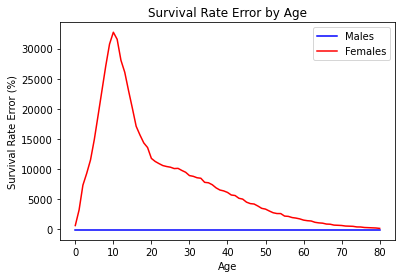

In [93]:
age_range = range(0,81)
plt.plot(age_range, male_age_diff_rf, label = 'Males', color = 'b')
plt.plot(age_range, female_age_diff_rf, label= 'Females', color = 'r')
plt.legend()
plt.title('Survival Rate Error by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate Error (%)')
plt.show()

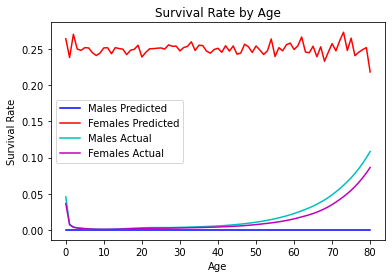

In [94]:
age_range = range(0,81)
male_age_avg = []
female_age_avg = []
for n in range(len(age_avg)):
    male_age_avg.append(age_avg[n]['male'])
    female_age_avg.append(age_avg[n]['female'])
plt.plot(age_range, male_age_pred_rf, label = 'Males Predicted', color = 'b')
plt.plot(age_range, female_age_pred_rf, label= 'Females Predicted', color = 'r')
plt.plot(age_range, male_age_avg, label = 'Males Actual', color = 'c')
plt.plot(age_range, female_age_avg, label= 'Females Actual', color = 'm')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()

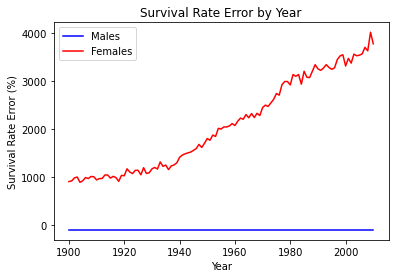

In [95]:
plt.plot(year_keys, male_year_diff_rf, label = 'Males', color = 'b')
plt.plot(year_keys, female_year_diff_rf, label= 'Females', color = 'r')
plt.title('Survival Rate Error by Year')
plt.xlabel('Year')
plt.ylabel('Survival Rate Error (%)')
plt.legend()
plt.show()

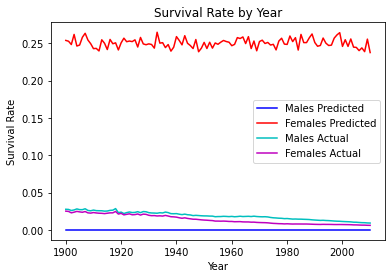

In [96]:
male_year_avg = []
female_year_avg = []
for n in range(len(year_keys)):
    male_year_avg.append(year_avg[year_keys[n]]['male'])
    female_year_avg.append(year_avg[year_keys[n]]['female'])
plt.plot(year_keys, male_year_pred_rf, label = 'Males Predicted', color = 'b')
plt.plot(year_keys, female_year_pred_rf, label= 'Females Predicted', color = 'r')
plt.plot(year_keys, male_year_avg, label = 'Males Actual', color = 'c')
plt.plot(year_keys, female_year_avg, label= 'Females Actual', color = 'm')
plt.title('Survival Rate by Year')
plt.xlabel('Year')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()

In [63]:
#Creating a neural network and performing the same analysis as above
import tensorflow as tf
from tensorflow import keras

nn=tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid", input_dim=8))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid", input_dim=8))

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
67/67 [==============================] - 0s 924us/step - loss: 0.8047 - accuracy: 0.3157
Epoch 2/100
67/67 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6876
Epoch 3/100
67/67 [==============================] - 0s 940us/step - loss: 0.5482 - accuracy: 0.7514
Epoch 4/100
67/67 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7795
Epoch 5/100
67/67 [==============================] - 0s 1ms/step - loss: 0.5042 - accuracy: 0.7810
Epoch 6/100
67/67 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7810
Epoch 7/100
67/67 [==============================] - 0s 985us/step - loss: 0.4917 - accuracy: 0.7810
Epoch 8/100
67/67 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7805
Epoch 9/100
67/67 [==============================] - 0s 955us/step - loss: 0.4861 - accuracy: 0.7838
Epoch 10/100
67/67 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7824
E

67/67 [==============================] - 0s 970us/step - loss: 0.4571 - accuracy: 0.7880
Epoch 83/100
67/67 [==============================] - 0s 970us/step - loss: 0.4570 - accuracy: 0.7894
Epoch 84/100
67/67 [==============================] - 0s 970us/step - loss: 0.4573 - accuracy: 0.7875
Epoch 85/100
67/67 [==============================] - 0s 909us/step - loss: 0.4569 - accuracy: 0.7871
Epoch 86/100
67/67 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7875
Epoch 87/100
67/67 [==============================] - 0s 924us/step - loss: 0.4571 - accuracy: 0.7889
Epoch 88/100
67/67 [==============================] - 0s 924us/step - loss: 0.4564 - accuracy: 0.7875
Epoch 89/100
67/67 [==============================] - 0s 924us/step - loss: 0.4565 - accuracy: 0.7875
Epoch 90/100
67/67 [==============================] - 0s 940us/step - loss: 0.4562 - accuracy: 0.7871
Epoch 91/100
67/67 [==============================] - 0s 909us/step - loss: 0.4563 - accuracy: 0.

In [64]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

23/23 - 0s - loss: 0.4852 - accuracy: 0.7736 - 95ms/epoch - 4ms/step
Loss: 0.48515158891677856, Accuracy: 0.7735583782196045


In [65]:
predictions = nn.predict(dummies_scaled)
predictions

30493/30493 [==============================] - 19s 610us/step


array([[0.23889261],
       [0.08990195],
       [0.33708876],
       ...,
       [0.2553675 ],
       [0.35782585],
       [0.03630624]], dtype=float32)

In [78]:
prediction_df = dummy_df.copy()
prediction_df['Survived'] = predictions
prediction_df

,Pclass,Sex,Age,Year,Survived
0,3rd Class,male,39.0,1979,0.238893
1,1st Class,male,64.0,1936,0.089902
2,Crew,male,42.0,1908,0.337089
3,2nd Class,female,64.0,2002,0.025602
4,3rd Class,female,41.0,1907,0.895506
...,...,...,...,...,...
975764,Crew,female,66.0,1936,0.049727
975765,Crew,male,33.0,1935,0.358962
975766,3rd Class,male,39.0,1972,0.255367
975767,2nd Class,male,32.0,1961,0.357826


In [79]:
male_prediction_df = prediction_df.loc[prediction_df['Sex'] == 'male'].reset_index(drop = True)
female_prediction_df = prediction_df.loc[prediction_df['Sex'] == 'female'].reset_index(drop = True)

In [80]:
male_age_pred = male_prediction_df.groupby(by='Age').mean()['Survived'].tolist()
female_age_pred = female_prediction_df.groupby(by='Age').mean()['Survived'].tolist()
male_age_pred

[0.2830356955528259,
 0.28049221634864807,
 0.28416529297828674,
 0.2837538719177246,
 0.2836553752422333,
 0.2863447070121765,
 0.2886810302734375,
 0.2916262149810791,
 0.2898496389389038,
 0.2960139811038971,
 0.29555419087409973,
 0.2977316379547119,
 0.2988538146018982,
 0.30044251680374146,
 0.30441874265670776,
 0.30630964040756226,
 0.307890385389328,
 0.3100986182689667,
 0.3127230107784271,
 0.3160158097743988,
 0.3181751072406769,
 0.3200390636920929,
 0.32199546694755554,
 0.32458174228668213,
 0.32693731784820557,
 0.3295929729938507,
 0.3306112289428711,
 0.3324563503265381,
 0.33321210741996765,
 0.33417269587516785,
 0.33589962124824524,
 0.33542442321777344,
 0.3365493416786194,
 0.3372674882411957,
 0.33661291003227234,
 0.3341422379016876,
 0.33287081122398376,
 0.3267885744571686,
 0.32020998001098633,
 0.30870217084884644,
 0.2985059916973114,
 0.2881127595901489,
 0.27678200602531433,
 0.26630550622940063,
 0.2543376684188843,
 0.24045072495937347,
 0.226596668362

In [81]:
male_age_diff = []
female_age_diff = []
for n in range(len(male_age_pred)):
    male_age_diff.append(100*(male_age_pred[n]-age_avg[n]['male'])/age_avg[n]['male'])
    female_age_diff.append(100*(female_age_pred[n]-age_avg[n]['female'])/age_avg[n]['female'])
male_age_diff

[520.0294849638905,
 3517.3285265967024,
 6769.008035877726,
 9600.509032547074,
 11974.885390785148,
 15097.310216095895,
 18845.572684749794,
 23114.318399692907,
 26961.182025736438,
 30728.71421973202,
 32056.314507679785,
 31376.88567983562,
 28640.674072145182,
 25008.31823673614,
 21609.68951209761,
 18529.01277456368,
 16094.007192103589,
 14304.480510485135,
 13024.271405013216,
 12098.11552958381,
 11216.064371584464,
 10474.76478182455,
 10045.043877089078,
 9941.996157473466,
 10031.110283846865,
 10204.24790092479,
 10267.824073595722,
 10254.018805991356,
 10044.583817511102,
 9730.171527572911,
 9418.072014069801,
 9069.318873041282,
 8762.087296329082,
 8448.516937509188,
 8100.340842239977,
 7697.263354563569,
 7314.972575820532,
 6836.76659292884,
 6367.687822302435,
 5821.345976519514,
 5322.061740962031,
 4840.670627972044,
 4369.967623161677,
 3941.0933940315026,
 3518.8407235373993,
 3100.0554488393896,
 2715.823433662233,
 2403.6234036932096,
 2090.6215732380733,

In [82]:
male_year_pred = male_prediction_df.groupby(by='Year').mean()['Survived'].tolist()
female_year_pred = female_prediction_df.groupby(by='Year').mean()['Survived'].tolist()

In [83]:
male_year_diff = []
female_year_diff = []

year_keys = list(year_avg.keys())

for n in range(len(year_keys)):
    male_year_diff.append(100*(male_year_pred[n]-year_avg[year_keys[n]]['male'])/year_avg[year_keys[n]]['male'])
    female_year_diff.append(100*(female_year_pred[n]-year_avg[year_keys[n]]['female'])/year_avg[year_keys[n]]['female'])
male_year_diff

[828.2293746830165,
 830.7163036141369,
 877.4083223439203,
 852.4826889902017,
 797.1985848799765,
 822.7847588602688,
 843.1417069439941,
 799.2853907606225,
 876.8548189405655,
 879.379703649263,
 847.5551365897328,
 879.8152776643266,
 887.9910626643681,
 881.9540312105171,
 897.6124245428217,
 911.2633805823957,
 868.3292968035257,
 866.1553558227826,
 792.9221869082708,
 1019.9501318524776,
 977.8059964525459,
 1060.0526021944972,
 1011.4661953122138,
 971.1229628245957,
 1008.9355686693807,
 1012.9029780929948,
 969.8738298202412,
 1041.0265568769264,
 966.1724959362232,
 979.955569799522,
 1030.2247712434744,
 1070.6717380002037,
 1071.5634793229758,
 1095.8024267494072,
 1062.2901075040813,
 1084.4823093313905,
 1034.055206835185,
 1080.31821661609,
 1159.843899436603,
 1158.3361307923758,
 1167.0337346388897,
 1203.1232475234099,
 1257.577704888657,
 1215.2239907774037,
 1272.548106402861,
 1297.718051886143,
 1350.4290655475577,
 1346.8358231149625,
 1381.8893514469462,
 140

In [84]:
import matplotlib.pyplot as plt

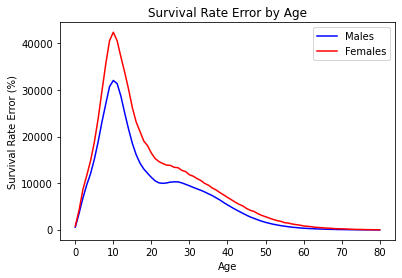

In [89]:
age_range = range(0,81)
plt.plot(age_range, male_age_diff, label = 'Males', color = 'b')
plt.plot(age_range, female_age_diff, label= 'Females', color = 'r')
plt.legend()
plt.title('Survival Rate Error by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate Error (%)')
plt.show()

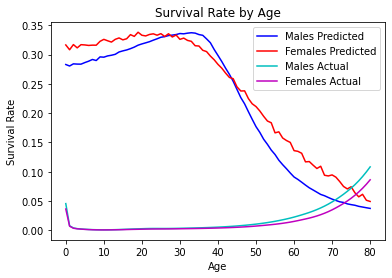

In [90]:
age_range = range(0,81)
male_age_avg = []
female_age_avg = []
for n in range(len(age_avg)):
    male_age_avg.append(age_avg[n]['male'])
    female_age_avg.append(age_avg[n]['female'])
plt.plot(age_range, male_age_pred, label = 'Males Predicted', color = 'b')
plt.plot(age_range, female_age_pred, label= 'Females Predicted', color = 'r')
plt.plot(age_range, male_age_avg, label = 'Males Actual', color = 'c')
plt.plot(age_range, female_age_avg, label= 'Females Actual', color = 'm')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()

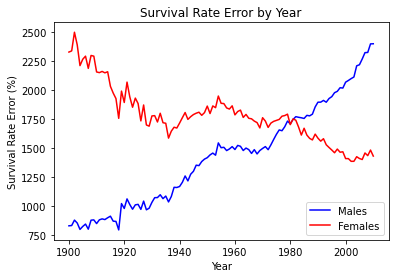

In [91]:
plt.plot(year_keys, male_year_diff, label = 'Males', color = 'b')
plt.plot(year_keys, female_year_diff, label= 'Females', color = 'r')
plt.title('Survival Rate Error by Year')
plt.xlabel('Year')
plt.ylabel('Survival Rate Error (%)')
plt.legend()
plt.show()

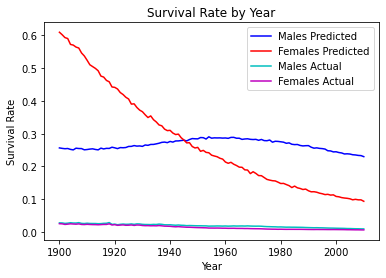

In [92]:
male_year_avg = []
female_year_avg = []
for n in range(len(year_keys)):
    male_year_avg.append(year_avg[year_keys[n]]['male'])
    female_year_avg.append(year_avg[year_keys[n]]['female'])
plt.plot(year_keys, male_year_pred, label = 'Males Predicted', color = 'b')
plt.plot(year_keys, female_year_pred, label= 'Females Predicted', color = 'r')
plt.plot(year_keys, male_year_avg, label = 'Males Actual', color = 'c')
plt.plot(year_keys, female_year_avg, label= 'Females Actual', color = 'm')
plt.title('Survival Rate by Year')
plt.xlabel('Year')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()